## Part 2: Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
   - how you will implement the experiment
   - what statistical test(s) you will conduct to verify the significance of the observation
   - how you would interpret the results and provide recommendations to the city operations team along with any caveats.

It sounds like the best time to run this experiement would be on the weekends, as this minimizes the difference of a driver's preference to work during the day or during the night. One assumption I see that this information provides is that drivers tend to pick one city over the other due to the toll bridge, but perhaps drivers have split themselves by city according to their ability or preference to drives nights over days (and vice versa). Therefore, focusing on the weekend is the best way to eliminate that potential bias. 

A key measure of success of this experiment would be first that the number of drivers making inter-city trips done on the would be higher, and second that the number of overall inter-city trips would be higher, too. 

Practical experiment: 
- The experiment would take place during weekends to minimize driver bias towards night or day drives.
- The statistical test would be an A/B test where certain drivers on the weekends would have their tolls reimbursed, and others would not. The drivers would be notified of this, but the toll-reimbursed drivers would have to be randomly selected from a pool of drivers with a history or working on the weekends ('history' meaning an established pattern of perhaps 3/4 weekends a month for a 3 month period within the last 6 months, for example).
- How test would be interpreted: The toll reimbursement has to be random or the trial is too self-selecting, so hopefully this bias would be minimized in the interpretation of the test. From the random group selected as per the parameters outlined above ('history' of working weekends), an analysis of the number of inter-city trips would be assessed. The drivers would have to know if they were in the group or not, because fundamentally this experiment is testing the power of toll-reimbursement as a motivator for working between two cities, over sticking to just one city. Statistically, we would use a t-test and consider a one-sided p-value of 0.05 as an indicator that toll reimbursements are worth potentially investing in. 
- The main caveats were described above, and a spearate experiment may be conducted to include weekdays if a way to account for the difference in rider time can be accounted for. Another risk may be that if a weekend driver is not selected to have their tolls reimbursed, they are now dis-incentivized to make inter-city trips. A pre-experiment step to prevent this may be to send out a survey asking if drivers were reimbursed for tolls on weekend trips, how much more inclined would they be to make inter-city trips? It would also be useful to poll them for other forms of motivation to make inter-city trips, but that is outside the scope of this request. One final caveat / interpretation note would be to assess what exactly the demand for inter-city trips is. What is the data for number of requests from one city to another? What percent of those trips are being fulfilled currently, and how would that number change during the experiment? 

If the results of this experiment indicate that toll reimbursement effectively increases the number of inter-city trips on the weekends for drivers, experiments will be rolled out for weekday drivers. 


## Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Wrangling: What fraction of the observed users were retained?

In [316]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [317]:
df.size

600000

In [318]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [319]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [320]:
df.avg_rating_of_driver.min()

1.0

In [321]:
# Because the minimum value of the 'average rating of driver' is 1, replace nan's here with the mean. 
# The range is capped so outliers won't distort this 
# df['A'] = df['A'].fillna(df['A'].mean())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())

In [322]:
# Replace nan phone types with ... ? may just drop this value as it appears to be less than 1% of all values
df['phone'].isna().sum() / len(df) * 100

0.792

In [323]:
df = df.dropna(subset=['phone'])

In [324]:
df.avg_rating_by_driver.min()

1.0

In [325]:
# Similar to avg_rating_of_driver, replace nan's with mean
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean())

In [326]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [327]:
# Check if the signups all occurred within January 2014 in this table as the first step to id-ing retained users
df.signup_date.max()

'2014-01-31'

In [328]:
df.signup_date.min()

'2014-01-01'

In [329]:
# Get the latest date in the table
df.last_trip_date.max()

'2014-07-01'

In [330]:
# Get the bottom end of the 'last trip date' range
df.last_trip_date.min()

'2014-01-01'

In [331]:
# Create a subset df of adopted users, based on criteria listed above
df_adopted_user = df[(pd.to_datetime(df['last_trip_date']) > '2014-06-01')]

In [332]:
df_adopted_user.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0


In [333]:
len(df_adopted_user)

18180

In [334]:
# So about a little over a third of the users were classified as 'retained' after six months
retained_users = round(len(df_adopted_user)/len(df) * 100, 2)
print("The percent of users retained was {}%.".format(retained_users))

The percent of users retained was 36.65%.


In [335]:
# Add adopted_user column to dataframe
df['adopted_user'] = np.where((pd.to_datetime(df['last_trip_date']) > '2014-06-01'), 1, 0)

In [336]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,adopted_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


### EDA

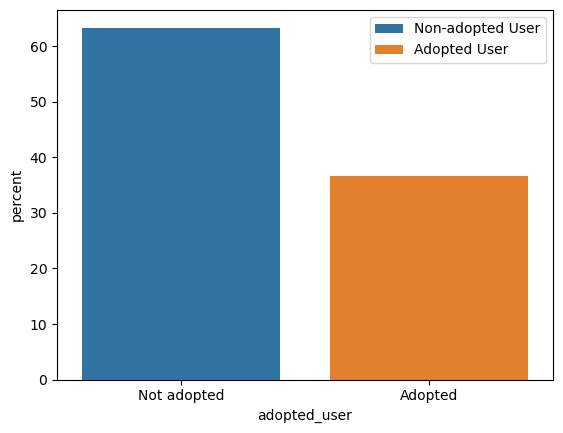

In [337]:
sns.countplot(x='adopted_user', data=df, stat='percent', hue='adopted_user')
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc="upper right")
plt.xticks([0,1], ['Not adopted', 'Adopted']);

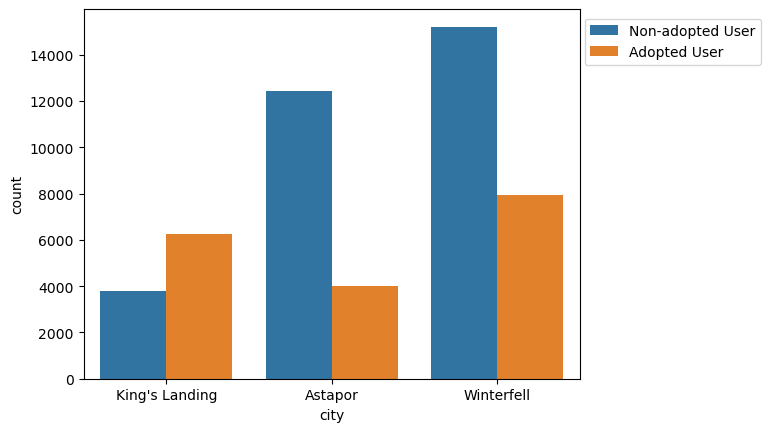

In [338]:
sns.countplot(x="city", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc=(1.01, 0.85));

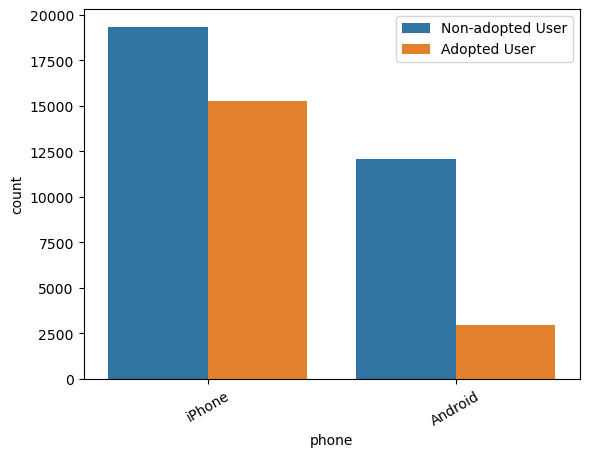

In [339]:
sns.countplot(x="phone", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc="upper right")
plt.xticks(rotation=30);

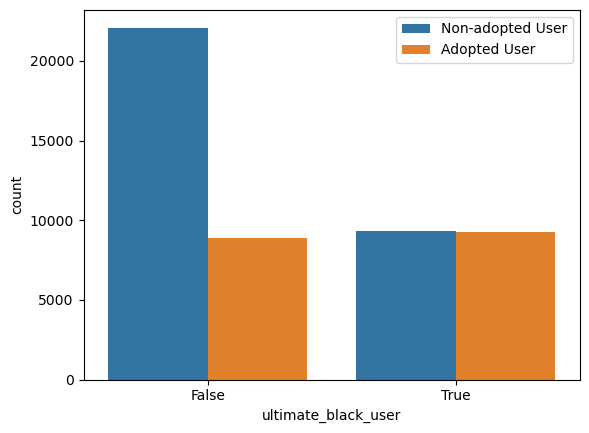

In [340]:
sns.countplot(x="ultimate_black_user", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc="upper right");

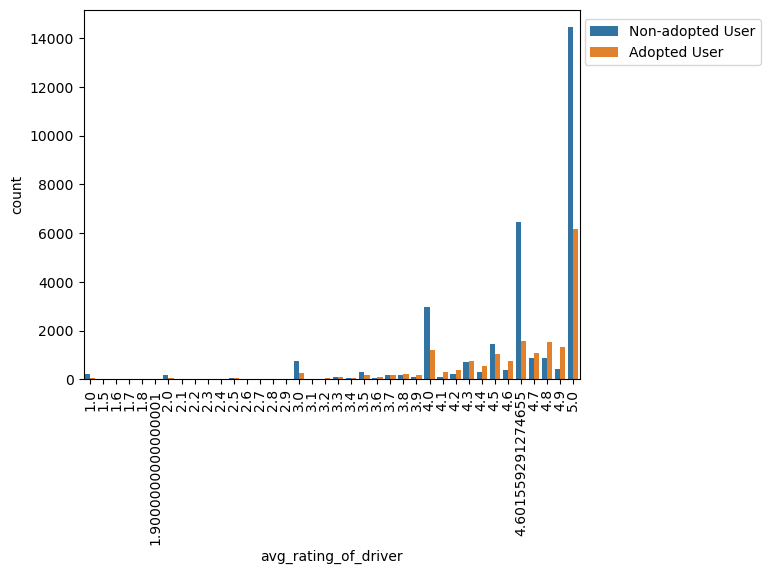

In [341]:
sns.countplot(x="avg_rating_of_driver", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc=(1.01, 0.85))
plt.xticks(rotation=90);

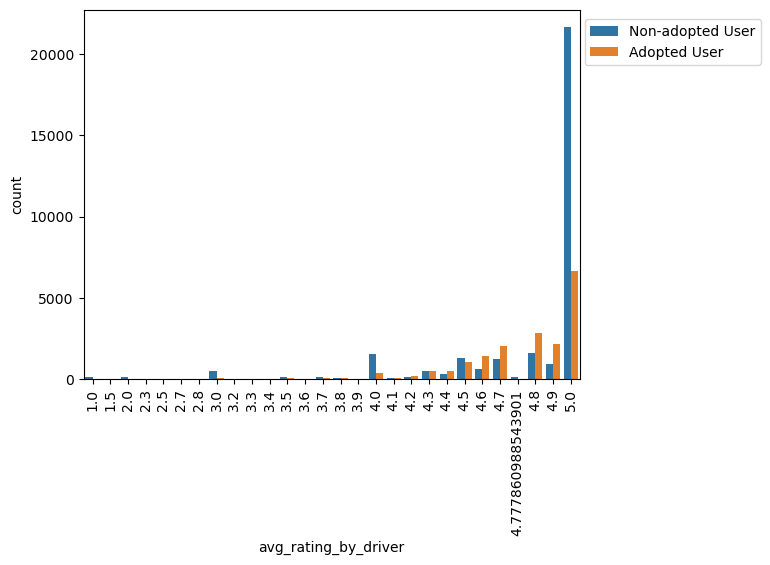

In [342]:
sns.countplot(x="avg_rating_by_driver", hue="adopted_user", data=df)
plt.legend(labels=["Non-adopted User", "Adopted User"], title="", loc=(1.01, 0.85))
plt.xticks(rotation=90);

### 2. Predictive Modeling - what factors are indicative of a retained user? 

In [343]:
# Try Logistic Regression first, then Random Forest

In [375]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate predictions
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score

In [345]:
# Convert ultimate_black_user booleans to 0 and 1
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

In [346]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,adopted_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [347]:
# Get y for modeling: 
y = df['adopted_user']
print('y: ', type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (49604,)


In [348]:
# Hot encode the two categorical features
categorical_features = ['city', 'phone']
df = pd.get_dummies(df, columns = categorical_features, dtype = int)

In [349]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,adopted_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0


In [350]:
# omit dates for modeling
df = df.drop(['signup_date', 'last_trip_date'], axis=1)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,adopted_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0


In [351]:
def get_metrics(ypred, ytrue=ytest):
    
    accuracy = accuracy_score(ytrue, ypred)
    cm = confusion_matrix(ytrue, ypred)
    recall = recall_score(ytrue, ypred)
    auc = roc_auc_score(ytrue, ypred)

    return (accuracy, cm, auc, recall)


def print_metrics(ypred, ytrue=ytest):
    accuracy, cm, auc, recall = get_metrics(ypred)
    print(f"The accuracy score is: {accuracy}")
    print(f"The confusion matrix is: \n {cm})")
    print(f"The AUC score is: {auc}")
    print(f"The recall score is: {recall}")

In [352]:
def cv_score(clf, x, y, score_func = accuracy_score):
    result = 0
    nfold = 5
    x.reset_index(drop = True, inplace = True)
    y.index = x.index
    for train, test in KFold(nfold, shuffle = True,
                             random_state = 42).split(x):
        clf.fit(x.loc[train, :], y[train])
        result += score_func(clf.predict(x.loc[test, :]), y[test])
    return result / nfold

In [353]:
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=42)

In [354]:
# Fit the scaler on the training set
scaler = StandardScaler()
scaler.fit(Xtrain)

# Transform training set
Xtrain_scaled = scaler.transform(Xtrain)

# Transform  test set using the same scaler
Xtest_scaled = scaler.transform(Xtest)


In [355]:
steps = [('scaler', StandardScaler()), ('LogReg', LogisticRegression())]

pipeline = Pipeline(steps)

In [356]:
pipeline.fit(Xtrain, ytrain)

logreg_preds = pipeline.predict(Xtest)

# Evaluate predictions
print_metrics(logreg_preds)


The accuracy score is: 0.719685515573027
The confusion matrix is: 
 [[5367  923]
 [1858 1773]])
The AUC score is: 0.6707771884833786
The recall score is: 0.4882952354723217


In [372]:
# Do cross-validation
clf = LogisticRegression(solver = 'liblinear', max_iter = 500)
score = cv_score(clf, Xtrain, ytrain)
print(f'{score:.2f}')

0.73


In [371]:
# the grid of parameters to search over

penalty = ['l2']
C = [0.001, 0.01, 0.1, 1, 10, 100]
solver = ['liblinear', 'newton-cg', 'saga', 'sag']
max_iter = [100, 150, 200, 250, 300, 400, 500]
param_grid = {
    'penalty': penalty,
    'C': C,
    'solver': solver,
    'max_iter': max_iter
}

# Just a sample to test C first, and then use RandomizedSearchCV below
scores = {}
for c in C: 
    clf = LogisticRegression(C = c, solver = 'liblinear', max_iter=500)
    scores[c] = (cv_score(clf, Xtrain, ytrain))
print(scores)

# A Cs score of 0 0.726 from C = 0.01 is the best C value here

{0.001: 0.7199554861469556, 0.01: 0.726381475134832, 0.1: 0.7253986852613525, 1: 0.7254490884871589, 10: 0.7254490884871589, 100: 0.7254742901000621}


In [368]:
# a more sophisticated CV

logreg = LogisticRegression()

logreg_cv = RandomizedSearchCV(logreg, param_distributions=param_grid,  cv=5, scoring='recall', n_jobs=-1, verbose=2)

logreg_cv.fit(Xtrain_scaled, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 150, 200, 250, 300,
                                                     400, 500],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'saga', 'sag']},
                   scoring='recall', verbose=2)

In [365]:
# Find best model and params
best_logreg = logreg_cv.best_estimator_

print(f"The best parameters are: {logreg_cv.best_params_}")

The best parameters are: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 400, 'C': 0.01}


In [361]:
# Get best feature indicators for adopted users and create a DataFrame with feature names and corresponding coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_logreg.coef_[0]})

coef_df['AbsoluteCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsoluteCoefficient', ascending=True)

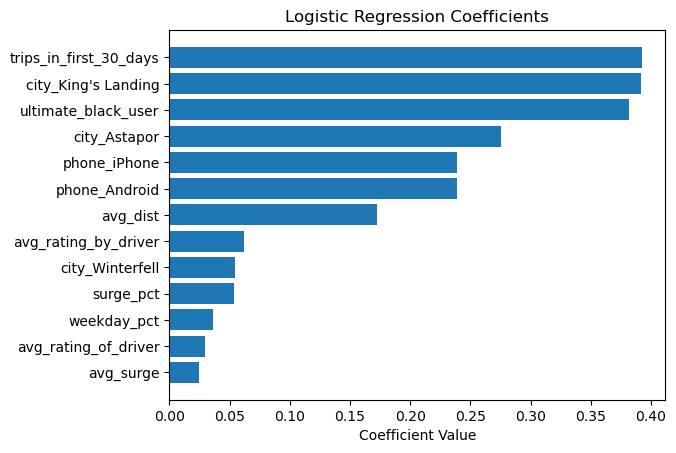

In [362]:
plt.barh(coef_df['Feature'], coef_df['AbsoluteCoefficient'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show();

In [374]:
clf = LogisticRegression(solver = 'liblinear', penalty='l2',  max_iter=400, C=0.01)
clf.fit(Xtrain, ytrain)

y_predict_training = clf.predict(Xtrain)
y_predict_test = clf.predict(Xtest)

print(accuracy_score(y_predict_test, ytest));
# Surprisingly this performed very slightly worse after the cross-validation (even if only by 1%)

0.7201894970265095


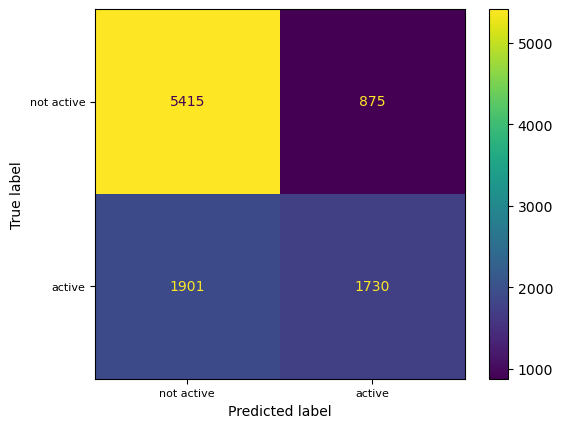

In [376]:
cm = confusion_matrix(ytest, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['not active', 'active'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['not active', 'active'], fontsize = 8)
ax.set_yticklabels(labels = ['not active', 'active'], fontsize = 8)
display_cm.plot(ax = ax);

### Resulsts of modeling

Because this was a classification problem ("what indicates a user would be acitve in 6 months?"), a logistic regression model was applied to the dataset, and a randomized search cross validation was performed to get the best hyper parameters for the model. 

According to the model, the top features that would indicate a user is more likely to remain active after 6 months: 
- The number of trips in the first 30 days
- They are Ultimate Black users
- They use the app in King's Landing


This model is only about 72% accurate (surprisingly 73% before the cross validation, but still quite close). The confusion matrix shows a high rate - 875/2605, or 33% false positve rate - of classifying a user as active, and a 25% false negative rate for active users. There is more that can be gleaned from this model, and for a second iteration I would try a Random Forest Classification to refine the feature importance, but I think that looking into usage by city, Ultimate Black usage, and even phone type would be three good candidates to investigate. 
